<h2>Task 1: Data Understanding & Preparation </h2>


In [153]:
#1. Load and understand the dataset structure. 

In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv("electricity_cost_dataset.csv")
df.head()

,site area,structure type,water consumption,recycling rate,utilisation rate,air qality index,issue reolution time,resident count,electricity cost
0,1360,Mixed-use,2519.0,69,52,188,1,72,1420.0
1,4272,Mixed-use,2324.0,50,76,165,65,261,3298.0
2,3592,Mixed-use,2701.0,20,94,198,39,117,3115.0
3,966,Residential,1000.0,13,60,74,3,35,1575.0
4,4926,Residential,5990.0,23,65,32,57,185,4301.0


In [3]:
df.columns

Index(['site area', 'structure type', 'water consumption', 'recycling rate',
       'utilisation rate', 'air qality index', 'issue reolution time',
       'resident count', 'electricity cost'],
      dtype='str')

In [4]:
df.shape

(10000, 9)

In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   site area             10000 non-null  int64  
 1   structure type        10000 non-null  str    
 2   water consumption     10000 non-null  float64
 3   recycling rate        10000 non-null  int64  
 4   utilisation rate      10000 non-null  int64  
 5   air qality index      10000 non-null  int64  
 6   issue reolution time  10000 non-null  int64  
 7   resident count        10000 non-null  int64  
 8   electricity cost      10000 non-null  float64
dtypes: float64(2), int64(6), str(1)
memory usage: 703.3 KB


In [154]:
#2. Check for missing values and datatypes. 


In [6]:
df.isnull().sum()

site area               0
structure type          0
water consumption       0
recycling rate          0
utilisation rate        0
air qality index        0
issue reolution time    0
resident count          0
electricity cost        0
dtype: int64

In [155]:
#3. Handle categorical variable (structure type) using encoding. 

In [7]:
#encode categorial column 'structure type'
df=pd.get_dummies(df,columns=['structure type'],drop_first=True)

In [156]:
#4. Separate features (X) and target variable (electricity cost). 

In [8]:
#seperate features x and y
x=df.drop('electricity cost',axis=1)
y=df['electricity cost']

In [9]:
x.head()

,site area,water consumption,recycling rate,utilisation rate,air qality index,issue reolution time,resident count,structure type_Industrial,structure type_Mixed-use,structure type_Residential
0,1360,2519.0,69,52,188,1,72,False,True,False
1,4272,2324.0,50,76,165,65,261,False,True,False
2,3592,2701.0,20,94,198,39,117,False,True,False
3,966,1000.0,13,60,74,3,35,False,False,True
4,4926,5990.0,23,65,32,57,185,False,False,True


In [26]:
x.columns

Index(['site area', 'water consumption', 'recycling rate', 'utilisation rate',
       'air qality index', 'issue reolution time', 'resident count',
       'structure type_Industrial', 'structure type_Mixed-use',
       'structure type_Residential'],
      dtype='str')

In [10]:
y.head()

0    1420.0
1    3298.0
2    3115.0
3    1575.0
4    4301.0
Name: electricity cost, dtype: float64

In [11]:
x.shape,y.shape

((10000, 10), (10000,))

<h2>Task 2: Exploratory Data Analysis <h2>


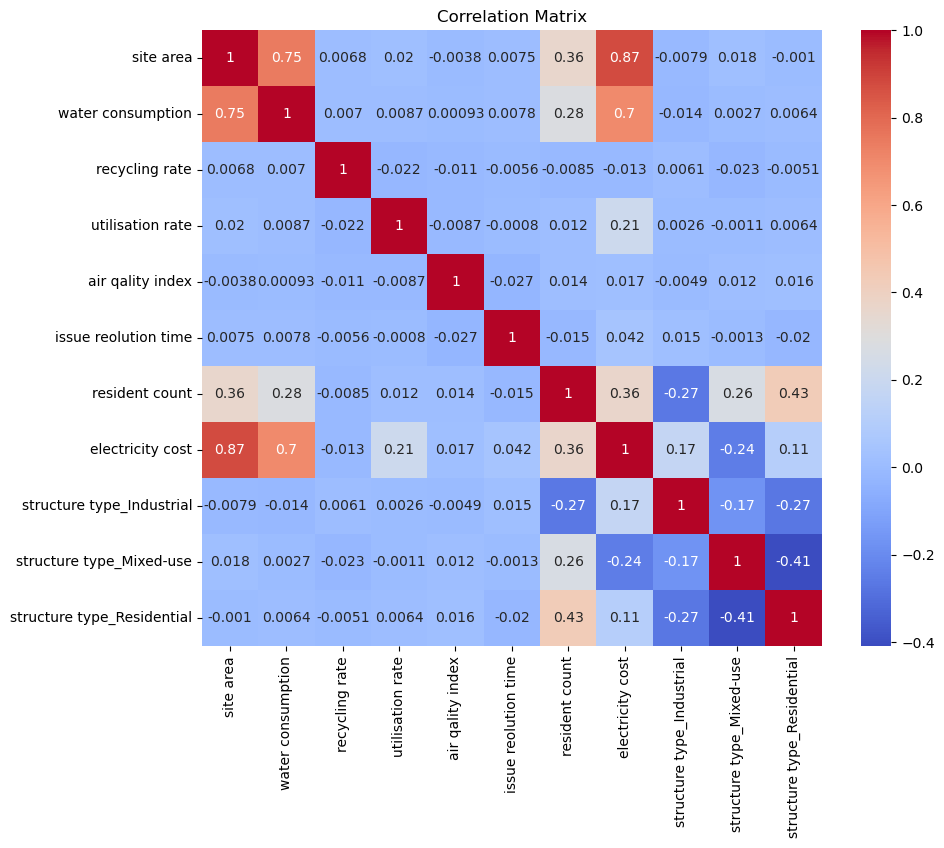

In [31]:
#6. Perform correlation analysis on numerical features. 
corr_matrix= df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [32]:
#7. Identify the most important features affecting electricity cost. 

corr_target=corr_matrix['electricity cost'].sort_values(ascending=False)
print(corr_target)

electricity cost              1.000000
site area                     0.874376
water consumption             0.698775
resident count                0.361609
utilisation rate              0.207215
structure type_Industrial     0.168785
structure type_Residential    0.112606
issue reolution time          0.042325
air qality index              0.017376
recycling rate               -0.012536
structure type_Mixed-use     -0.244613
Name: electricity cost, dtype: float64


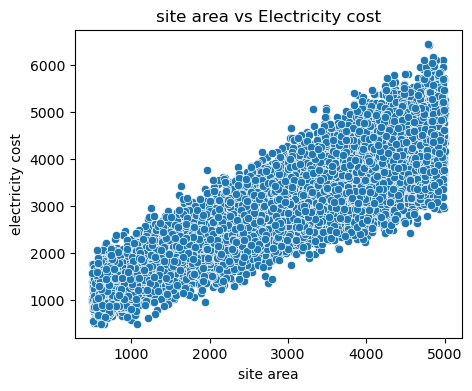

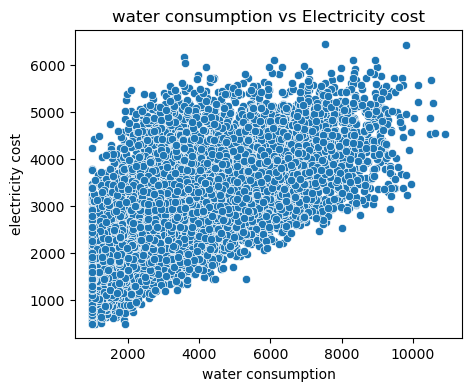

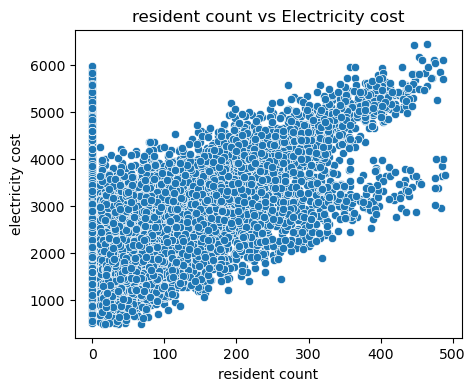

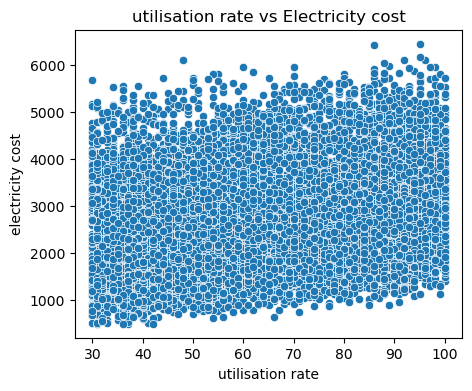

In [34]:
#8. Visualize relationships between important features and the target variable. 
imp_features=corr_target.index[1:5]

for feature in imp_features:

    plt.figure(figsize=(5,4))
    sns.scatterplot(x=df[feature],y=df['electricity cost'])
    plt.title(f"{feature} vs Electricity cost")
    plt.show()

<h2>Task 3: Build the Linear Regression Model <h2>

In [36]:
#9. Split the dataset into training and testing sets (80:20). 

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [38]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size =0.2, random_state=42)

In [41]:
#10. Train a Multiple Linear Regression model. 

In [47]:
#5. Apply feature scaling where necessary. 
#scaling
scaler=StandardScaler()

In [48]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [49]:
x_train_scaled.shape,x_test_scaled.shape

((8000, 10), (2000, 10))

In [50]:
#modelling

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [52]:
lr_model=LinearRegression()
lr_model.fit(x_train_scaled,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [53]:
#11. Evaluate performance using RMSE and R² score. 

In [21]:
#predictions
y_train_pred=lr_model.predict(x_train_scaled)
y_test_pred=lr_model.predict(x_test_scaled)

In [22]:
#evaluation of rmse and r2 score
train_rmse=np.sqrt(mean_squared_error(y_train,y_train_pred))
test_rmse=np.sqrt(mean_squared_error(y_test,y_test_pred))

train_r2=r2_score(y_train,y_train_pred)
test_r2=r2_score(y_test,y_test_pred)

In [23]:
train_rmse,test_rmse

(307.47362792098, 312.0607337180818)

In [24]:

train_r2,test_r2

(0.9224799084910268, 0.9219379221210353)

<h2>Task 4: Build the Polynomial Regression Models <h2>

In [55]:
#12. Apply Polynomial Features (degree 2 and 3) on selected important features. 
#13. Train Polynomial Regression models (2 Models, degree 2 once, degree 3 once) 


In [56]:
important_features=[
    'site area', 'water consumption', 'recycling rate', 'utilisation rate']
x_train_imp=x_train[important_features]
x_test_imp=x_test[important_features]

In [58]:
#polynomial degree 2
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [60]:
polynomial_2=PolynomialFeatures(degree=2)
x_train_poly2=polynomial_2.fit_transform(x_train_imp)
x_test_poly2=polynomial_2.transform(x_test_imp)

poly2_model=LinearRegression()
poly2_model.fit(x_train_poly2,y_train)

#predictions
poly2_train_pred=poly2_model.predict(x_train_poly2)
poly2_test_pred=poly2_model.predict(x_test_poly2)

In [70]:
from sklearn.metrics import mean_squared_error,r2_score

poly2_train_rmse=np.sqrt(mean_squared_error(y_train,poly2_train_pred))
poly2_test_rmse=np.sqrt(mean_squared_error(y_test,poly2_test_pred))

poly2_r2=r2_score(y_test,poly2_test_pred)
                         

In [78]:
print(poly2_train_rmse,poly2_test_rmse)

486.91772684432516 488.9034464855092


In [81]:
poly2_r2

0.8083944633544587

In [82]:
#polynomial degree 3
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [83]:
polynomial_3=PolynomialFeatures(degree=3)
x_train_poly3=polynomial_3.fit_transform(x_train_imp)
x_test_poly3=polynomial_3.transform(x_test_imp)

poly3_model=LinearRegression()
poly3_model.fit(x_train_poly3,y_train)

#predictions
poly3_train_pred=poly3_model.predict(x_train_poly3)
poly3_test_pred=poly3_model.predict(x_test_poly3)

In [84]:
#evaluation metrics
from sklearn.metrics import mean_squared_error,r2_score

poly3_train_rmse=np.sqrt(mean_squared_error(y_train,poly3_train_pred))
poly3_test_rmse=np.sqrt(mean_squared_error(y_test,poly3_test_pred))

poly3_r2=r2_score(y_test,poly3_test_pred)

In [85]:
poly3_train_rmse,poly3_test_rmse

(486.3558006358138, 489.78899139834925)

In [86]:
poly3_r2

0.8076997291492147

<h2>Task 5: Regularization Techniques <h2>


In [88]:
#15. Apply L1 Regularization (Lasso Regression). 

In [90]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

In [91]:
lasso=Lasso(alpha = 0.1)
lasso.fit(x_train_scaled,y_train)

lasso_train_pred=lasso.predict(x_train_scaled)
lasso_test_pred=lasso.predict(x_test_scaled)

lasso_train_rmse=np.sqrt(mean_squared_error(y_train,lasso_train_pred))
lasso_test_rmse=np.sqrt(mean_squared_error(y_test,lasso_test_pred))

In [92]:
lasso_train_rmse,lasso_test_rmse

(307.47389855672344, 312.0439591613426)

In [93]:
#16. Apply L2 Regularization (Ridge Regression). 

In [95]:
from sklearn.linear_model import Ridge

ridge=Ridge(alpha =1.0)
ridge.fit(x_train_scaled,y_train)

ridge_train_pred=ridge.predict(x_train_scaled)
ridge_test_pred=ridge.predict(x_test_scaled)

ridge_train_rmse=np.sqrt(mean_squared_error(y_train,ridge_train_pred))
ridge_test_rmse=np.sqrt(mean_squared_error(y_test,ridge_test_pred))

In [96]:
ridge_train_rmse,ridge_test_rmse

(307.4736672438889, 312.0601587252489)

In [101]:
#17. Tune the regularization (alpha) manually. 

In [115]:
alphas = [0.001,1,0.2,0.5,0.9,0.96,10,20,0.09]

In [116]:
for a in alphas:
    ridge=Ridge(alpha=a)
    ridge.fit(x_train_scaled,y_train)
    pred=ridge.predict(x_test_scaled)
    rmse=np.sqrt(mean_squared_error(y_test,pred))
    print("Ridge alpha:",a ,"Test RMSE:",rmse)

Ridge alpha: 0.001 Test RMSE: 312.06073310339383
Ridge alpha: 1 Test RMSE: 312.0601587252489
Ridge alpha: 0.2 Test RMSE: 312.0606123628675
Ridge alpha: 0.5 Test RMSE: 312.0604362916113
Ridge alpha: 0.9 Test RMSE: 312.0602126507722
Ridge alpha: 0.96 Test RMSE: 312.0601802002258
Ridge alpha: 10 Test RMSE: 312.05853358290705
Ridge alpha: 20 Test RMSE: 312.0641119236438
Ridge alpha: 0.09 Test RMSE: 312.0606787146525


In [117]:
for a in alphas:
    lasso=Lasso(alpha = a)
    lasso.fit(x_train_scaled,y_train)
    pred= lasso.predict(x_test_scaled)
    rmse=np.sqrt(mean_squared_error(y_test,pred))
    print("Lasso alpha:",a,"Test RMSE:",rmse)

Lasso alpha: 0.001 Test RMSE: 312.06056342176976
Lasso alpha: 1 Test RMSE: 311.9169494430676
Lasso alpha: 0.2 Test RMSE: 312.0277526405097
Lasso alpha: 0.5 Test RMSE: 311.98223368618847
Lasso alpha: 0.9 Test RMSE: 311.928951640468
Lasso alpha: 0.96 Test RMSE: 311.9216888540624
Lasso alpha: 10 Test RMSE: 312.936629480426
Lasso alpha: 20 Test RMSE: 318.8697118486223
Lasso alpha: 0.09 Test RMSE: 312.04564028367014


<h2>Task 6: LassoCV and RidgeCV Models<h2>

In [152]:
#19. Apply K-Fold (use folds 5) Cross-Validation on: 

In [122]:
#lassoCV
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error

lasso_cv=LassoCV(cv=5)
lasso_cv.fit(x_train_scaled,y_train)

print("Best alpha of LassoCV:",lasso_cv.alpha_)

lasso_cv_pred=lasso_cv.predict(x_test_scaled)

lasso_cv_rmse=np.sqrt(mean_squared_error(y_test,lasso_cv_pred))
print("LassoCV Test RMSE:",lasso_cv_rmse)

Best alpha of LassoCV: 0.9645172535941688
LassoCV Test RMSE: 311.92114952077446


In [123]:
from sklearn.linear_model import RidgeCV
ridge_cv=RidgeCV(cv=5)
ridge_cv.fit(x_train_scaled,y_train)

print("Best alpha for RidgeCV:",ridge_cv.alpha_)

ridge_cv_pred=ridge_cv.predict(x_test_scaled)

ridge_cv_rmse=np.sqrt(mean_squared_error(y_test,ridge_cv_pred))
print("RidgeCV Test RMSE:",ridge_cv_rmse)


Best alpha for RidgeCV: 10.0
RidgeCV Test RMSE: 312.05853358290705


<h2>Task 7: Hyperparameter Tuning using GridSearchCV <h2>

In [126]:
#21. Apply GridSearchCV to: Lasso Regression

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [127]:
param_grid = {'alpha': [0.001,1,10,0.02,0.1,10,20]}

lasso =Lasso()

grid=GridSearchCV(
    estimator = lasso,
    param_grid = param_grid,
    cv=5,
    scoring = 'neg_mean_squared_error')

grid.fit(x_train_scaled,y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Lasso()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'alpha': [0.001, 1, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'neg_mean_squared_error'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also displayed;- >3 : the fold and candidate parameter

In [129]:
#22. Identify the best hyperparameters (alpha value) 

print("Best alpha:",grid.best_params_)

Best alpha: {'alpha': 0.1}


In [131]:
#23. Train the final optimized model using best parameters. 
lasso_best=grid.best_estimator_
print(lasso_best)

Lasso(alpha=0.1)


In [132]:
#24. Evaluate final model performance on test data. 
from sklearn.metrics import mean_squared_error

final_pred=lasso_best.predict(x_test_scaled)

final_rmse=np.sqrt(mean_squared_error(y_test,final_pred))

print("final Lasso Test RMSE:",final_rmse)

final Lasso Test RMSE: 312.0439591613426


<h2>Task 8: Comparison and Selection<h2>

In [135]:
result= pd.DataFrame({
    "Model":[
        "Linear Regression",
        "Polynomial Degree 2",
        "Polynomial Degree 3",
        "Ridge Regression",
        "Lasso Regression",
        "LassoCV",
        "RidgeCV",
        "Grid Search (Lasso)"],
    "Train RMSE":[
        train_rmse,
        poly2_train_rmse,
        poly3_train_rmse,
        ridge_train_rmse,
        lasso_train_rmse,
        lasso_train_rmse,
        ridge_train_rmse,
        lasso_train_rmse],
    "Test RMSE":[
        test_rmse,
        poly2_test_rmse,
        poly3_test_rmse,
        ridge_test_rmse,
        lasso_test_rmse,
        lasso_test_rmse,
        ridge_test_rmse,
        final_rmse],
    "R2 Score":[
        test_r2,
        poly2_r2,
        poly3_r2,
        test_r2,
        test_r2,
        test_r2,
        test_r2,
        test_r2]})

print(result)

                 Model  Train RMSE   Test RMSE  R2 Score
0    Linear Regression  307.473628  312.060734  0.921938
1  Polynomial Degree 2  486.917727  488.903446  0.808394
2  Polynomial Degree 3  486.355801  489.788991  0.807700
3     Ridge Regression  307.473667  312.060159  0.921938
4     Lasso Regression  307.473899  312.043959  0.921938
5              LassoCV  307.473899  312.043959  0.921938
6              RidgeCV  307.473667  312.060159  0.921938
7  Grid Search (Lasso)  307.473899  312.043959  0.921938


In [138]:
#predict with new data
new_data = pd.DataFrame([[5000, 200, 40, 70, 90, 5, 300, 0, 1, 0]], columns=x.columns)


In [139]:
new_data_scaled=scaler.transform(new_data)

In [140]:
predicted_cost=lasso_best.predict(new_data_scaled)
print("Predicted Electicity cost:",predicted_cost[0])

Predicted Electicity cost: 3864.2409528440694


In [144]:
print("Predicted Electicity cost:",predicted_cost[0])

Predicted Electicity cost: 3864.2409528440694


<h2>Task 9: Final Model Justification & Business Insights <h2>